# Baseline Model-Linear Regression

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#loading the data into dataframe using pandas
df = pd.read_csv('craiglist_cleaned_data')

In [3]:
#checking Null values
df.isna().sum()

Unnamed: 0            0
region                0
price                 0
year                  0
manufacturer          0
model                 0
condition             0
cylinders             0
fuel                  0
odometer              0
title_status          0
transmission          0
drive                 0
size                  0
type                  0
paint_color      129401
state                 0
lat                6890
long               6890
posting_date          0
posting_year          0
posting_month         0
age                   0
Region                0
Division              0
dtype: int64

In [4]:
#checking summary of dataset
df.describe()

,Unnamed: 0,price,year,cylinders,odometer,lat,long,posting_year,posting_month,age
count,431209.000000,4.312090e+05,431209.000000,431209.000000,4.312090e+05,424319.000000,424319.000000,431209.0,431209.000000,431209.000000
mean,215604.000000,2.528218e+04,2011.082554,3.737028,1.014030e+05,38.573630,-94.467829,2020.0,11.200497,8.917446
std,124479.460451,5.525037e+06,8.135120,3.121975,3.120471e+06,5.866900,17.970413,0.0,0.400384,8.135120
min,0.000000,0.000000e+00,1900.000000,0.000000,0.000000e+00,-82.607549,-164.091797,2020.0,10.000000,-1.000000
25%,107802.000000,4.995000e+03,2008.000000,0.000000,4.299600e+04,34.710800,-110.927661,2020.0,11.000000,4.000000
50%,215604.000000,1.099500e+04,2013.000000,4.000000,9.073400e+04,39.286850,-88.435410,2020.0,11.000000,7.000000
75%,323406.000000,2.140000e+04,2016.000000,6.000000,1.350000e+05,42.514300,-81.130653,2020.0,11.000000,12.000000
max,431208.000000,3.615215e+09,2021.000000,12.000000,2.043756e+09,82.049255,150.898969,2020.0,12.000000,120.000000


In [5]:
#creating dummies variables of the catergorial variables
dummies=['manufacturer','size','cylinders','condition','Division','drive',
         'fuel','title_status','transmission','type']
df =  pd.get_dummies(df, columns = dummies, drop_first = True )

In [6]:
#checking the columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431209 entries, 0 to 431208
Columns: 106 entries, Unnamed: 0 to type_wagon
dtypes: float64(5), int64(4), object(6), uint8(91)
memory usage: 86.8+ MB


In [7]:
#dropping the unconclusive columns
df=df.drop(columns=["posting_date","Unnamed: 0","age","paint_color",
                   "posting_month","region","model","lat","state","Region",
                    "posting_year","long"],axis=1)

In [8]:
#function for the linear regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
#Fuction for the linear regression
def linear_regression(df):

    data = df.copy()

    y = data['price']
    X = data.drop(['price'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                       random_state =42)

    print("X_test length",len(X_test))

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)


    mse_train = mean_squared_error(y_train, y_hat_train)
    mse_test = mean_squared_error(y_test, y_hat_test)

    print('Train MSE:', mse_train)
    print('Test MSE:', mse_test)

    print('RMSE Train:', np.sqrt(mse_train))
    print('RMSE Test:', np.sqrt(mse_test))

    print('R2 Score:', round(r2_score(y_test, y_hat_test),3))

    residuals = (y_test - y_hat_test)

    statsmodels.graphics.gofplots.qqplot(residuals, line = "r")
    return (linreg)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431209 entries, 0 to 431208
Data columns (total 94 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price                        431209 non-null  int64  
 1   year                         431209 non-null  float64
 2   odometer                     431209 non-null  float64
 3   manufacturer_alfaromeo       431209 non-null  uint8  
 4   manufacturer_astonmartin     431209 non-null  uint8  
 5   manufacturer_audi            431209 non-null  uint8  
 6   manufacturer_bmw             431209 non-null  uint8  
 7   manufacturer_buick           431209 non-null  uint8  
 8   manufacturer_cadillac        431209 non-null  uint8  
 9   manufacturer_chevrolet       431209 non-null  uint8  
 10  manufacturer_chrysler        431209 non-null  uint8  
 11  manufacturer_datsun          431209 non-null  uint8  
 12  manufacturer_dodge           431209 non-null  uint8  
 13 

X_test length 86242
Train MSE: 38088175785239.92
Test MSE: 258061350257.1652
RMSE Train: 6171561.859467984
RMSE Test: 507997.39197870414
R2 Score: -0.022


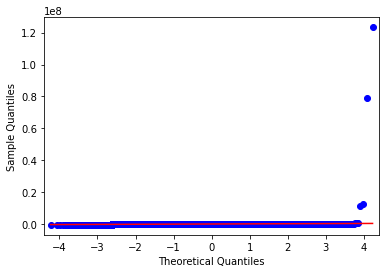

In [10]:
linreg = linear_regression(df)

# Model Dealing with outliers 

**outliers**

In [11]:
df.describe()

,price,year,odometer,manufacturer_alfaromeo,manufacturer_astonmartin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_landrover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,size_full,size_mid,size_subcompact,size_unknown,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,cylinders_12,condition_fair,condition_good,condition_new,condition_salvage,condition_unknown,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_New England,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central,drive_fwd,drive_rwd,drive_unknown,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_partsonly,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,type_bus,type_convertible,type_coupe,type_hatchback,type_minivan,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
count,4.312090e+05,431209.000000,4.312090e+05,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000,431209.000000
mean,2.528218e+04,2011.082554,1.014030e+05,0.000434,0.000079,0.012848,0.028318,0.013738,0.015373,0.147325,0.017168,0.000128,0.038084,0.000218,0.002171,0.181826,0.039187,0.000318,0.058902,0.025095,0.008462,0.002382,0.048262,0.020139,0.000049,0.016210,0.007637,0.013560,0.024308,0.003759,0.005329,0.005146,0.000007,0.053818,0.006969,0.004091,0.038420,0.003166,0.003124,0.024019,0.002449,0.087920,0.024025,0.006428,0.152070,0.093498,0.007716,0.698557,0.000923,0.210216,0.004309,0.235069,0.178106,0.003386,0.000227,0.016143,0.255827,0.002755,0.001364,0.414008,0.051928,0.095455,0.104859,0.056729,0.196687,0.178980,0.077549,0.087011,0.273547,0.129805,0.283123,0.005120,0.886535,0.013163,0.035331,0.004585,0.001224,0.000329,0.019241,0.009177,0.054630,0.073959,0.000983,0.014429,0.041040,0.036470,0.014109,0.001317,0.287828,0.096167,0.207241,0.076450,0.021240,0.023580
std,5.525037e+06,8.135120,3.120471e+06,0.020820,0.008879,0.112617,0.165880,0.116402,0.123032,0.354430,0.129897,0.011293,0.191398,0.014763,0.046540,0.385701,0.194041,0.017822,0.235441,0.156413,0.091601,0

Summary of the data shows that minimum price is 0 dollars and maximum price is 3.6 billion. Minimum miles of odometer is
0 miles and<br> maximum is 2 billion miles. Checking for the outliers in these columns and eliminate the outliers to reduce the negative impact on prediction.

**<font size="4">price</font>**

C:\Users\vijay\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 200000.0)

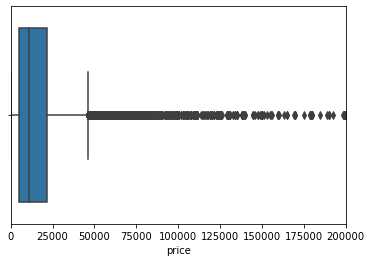

In [12]:
#plotting the boxplot of price to check the outliers
sns.boxplot(df.price)
plt.xlim(0,200000)

In [13]:
#eliminating outlier in the column 'price' and assigning to new dataframe
df1 = df[(df.price > 500)&(df.price < 50000)]
df1.shape

(383044, 94)

**<font size ="4">odometer</font>**

C:\Users\vijay\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 700000.0)

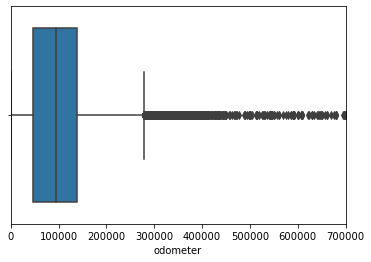

In [14]:
#plotting the boxplot of the column 'odometer' to check the outliers
sns.boxplot(df1.odometer)
plt.xlim(0,700000)

In [15]:
#eliminating the outliers in the column 'odometer' 
df1 = df1[(df1.odometer > 20) & (df1.odometer < 300000)]
df1.shape

(379128, 94)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379128 entries, 0 to 431208
Data columns (total 94 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price                        379128 non-null  int64  
 1   year                         379128 non-null  float64
 2   odometer                     379128 non-null  float64
 3   manufacturer_alfaromeo       379128 non-null  uint8  
 4   manufacturer_astonmartin     379128 non-null  uint8  
 5   manufacturer_audi            379128 non-null  uint8  
 6   manufacturer_bmw             379128 non-null  uint8  
 7   manufacturer_buick           379128 non-null  uint8  
 8   manufacturer_cadillac        379128 non-null  uint8  
 9   manufacturer_chevrolet       379128 non-null  uint8  
 10  manufacturer_chrysler        379128 non-null  uint8  
 11  manufacturer_datsun          379128 non-null  uint8  
 12  manufacturer_dodge           379128 non-null  uint8  
 13 

X_test length 75826
Train MSE: 44076664.41411939
Test MSE: 44218051.02866264
RMSE Train: 6639.025863341654
RMSE Test: 6649.665482463207
R2 Score: 0.645


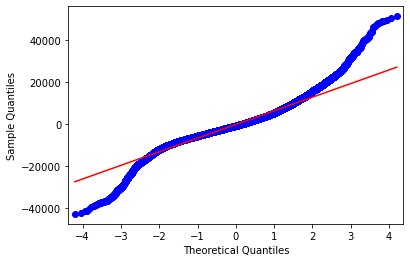

In [17]:
linreg1 = linear_regression(df1)

# Random Forest Model

In [18]:
y = df1['price']
X = df1.drop(['price'], axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                       random_state =42)

In [20]:
from sklearn.ensemble import RandomForestRegressor
# Train the RandomForestClassifier model
rfc = RandomForestRegressor(random_state = 2, n_estimators = 10, max_depth =5)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=2)

In [21]:
y_hat_train1 = rfc.predict(X_train)
y_hat_test1 = rfc.predict(X_test)


In [22]:
print('Mean Squared Error Train', mean_squared_error(y_train, y_hat_train1))
print('Mean Squared Error Test', mean_squared_error(y_test,y_hat_test1))
print('R-squared Score Train', rfc.score(X_train,y_train))
print('R-squared Score Test:', rfc.score(X_test,y_test))

Mean Squared Error Train 44598084.57529831
Mean Squared Error Test 44755331.98869176
R-squared Score Train 0.6431309078037577
R-squared Score Test: 0.6407911334966266


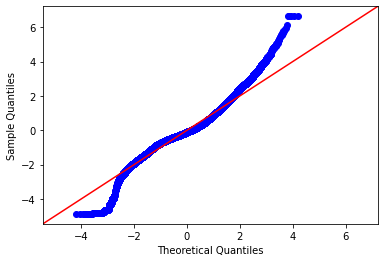

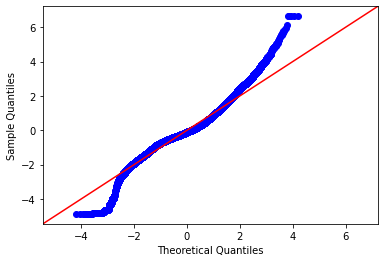

In [23]:
import scipy.stats as stats
residuals_r = (y_test - y_hat_test1)
sm.graphics.qqplot(residuals_r, dist= stats.norm, line = "45", fit =True)


# Random Forest with GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV
rfc_param = { 'n_estimators': [100,200],
               'max_depth' : [90,100],
               'max_features': [2,3],
              'min_samples_leaf':[3,4]}

In [25]:
forest = RandomForestRegressor(random_state = 2)
rfc_grid = GridSearchCV(estimator= forest,
                          param_grid=rfc_param, n_jobs = -1, verbose=2 )

In [26]:
rfc_grid.fit(X_train, y_train)
rfc_grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 24.5min finished


{'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [27]:
y_hat_train2 = rfc_grid.predict(X_train)
y_hat_test2= rfc_grid.predict(X_test)


In [28]:
print('Mean Squared Error Train ', mean_squared_error(y_train, y_hat_train2))
print('Mean Squared Error Test', mean_squared_error(y_test,y_hat_test2))
print('R-squared Score Test:', rfc_grid.score(X_test,y_test))

Mean Squared Error Train  31241471.647450704
Mean Squared Error Test 32856754.545662798
R-squared Score Test: 0.7362897998319129


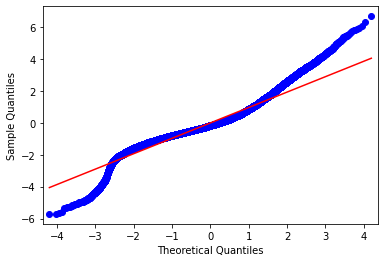

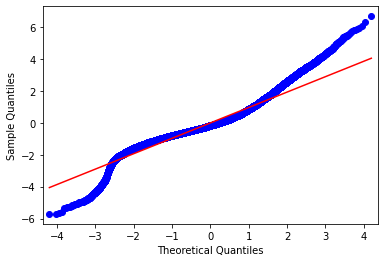

In [29]:
residuals_gr = (y_test - y_hat_test2)
sm.graphics.qqplot(residuals_gr, dist= stats.norm, line = "r", fit =True)


In [30]:
best_grid = rfc_grid.best_estimator_

In [31]:
importances= best_grid.feature_importances_
indices = np.argsort(importances)[::-1]
feature = []
importance =[]
for f in range(X.shape[1]):
    feature.append(X.columns[indices[f]])
    importance.append(round(importances[indices[f]],3))


In [32]:
features=pd.DataFrame({'Features':feature[:15], 'Importance(%)':importance[:15]})
features

,Features,Importance(%)
0,year,0.292
1,odometer,0.209
2,drive_fwd,0.053
3,type_pickup,0.044
4,cylinders_4,0.032
5,cylinders_8,0.031
6,fuel_gas,0.031
7,transmission_other,0.026
8,size_unknown,0.020
9,type_sedan,0.018


Text(0.5, 1.0, 'Top 15 Important Features')

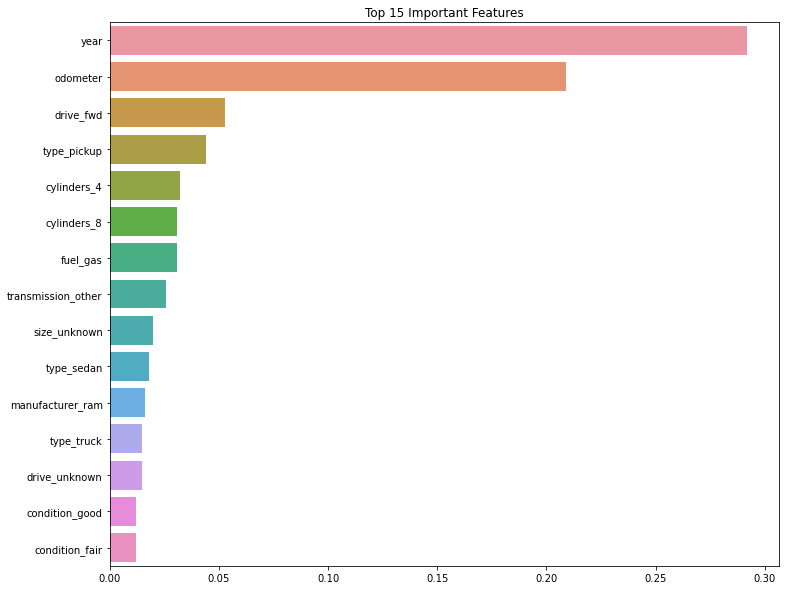

In [33]:
#plotting the top 15 important Features of the Decision Tree of resampled data
plt.figure(figsize = (12,10))
sns.barplot(y=feature[:15], x=importance[:15])
plt.title("Top 15 Important Features")

# Neutral Network Model

In [34]:
from keras.layers import Input, Dense,Dropout, Activation
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor

In [35]:
y = df1['price']
X = df1.drop(['price'], axis = 1)

X_train_tk, X_test_tk,y_train_tk,y_test_tk = train_test_split(X,y,
                                                            test_size=0.20,
                                                            random_state=42)

In [42]:
def build_model():
    model = Sequential()
    model.add(Dense(128, input_dim =93, activation='relu', kernel_initializer= 'normal'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, kernel_initializer ='normal'))
   
    model.compile(loss='mse', optimizer='adam',
             metrics=['mae','mse'])
    return model

In [43]:
model1=build_model()
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               12032     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 26,561
Trainable params: 26,561
Non-trainable params: 0
_________________________________________________________________


In [44]:
EPOCHS=10
history = model1.fit(X_train_tk, y_train_tk, epochs=EPOCHS, validation_split=0.2,
                   verbose=0)

In [46]:
train_pred= model1.predict(X_train_tk).flatten()
test_pred = model1.predict(X_test_tk).flatten()

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
print('Train Mean Squared error', mean_squared_error(y_train_tk, train_pred))
print('Test Mean Squared error', mean_squared_error(y_test_tk, test_pred))
print('Train R2-score',r2_score(y_train_tk, train_pred))
print('test R2-score',r2_score(y_test_tk, test_pred))

Train Mean Squared error 48642697.53215554
Test Mean Squared error 48622767.684527494
Train R2-score 0.6107663484747174
test R2-score 0.6097508723512763


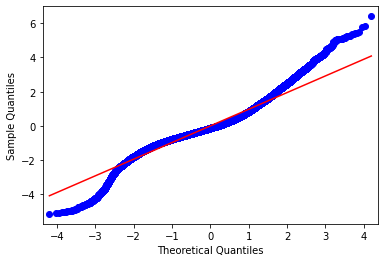

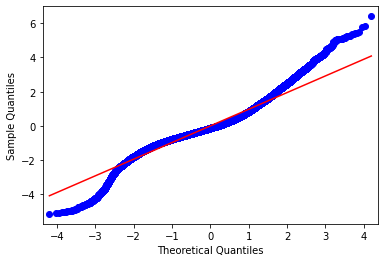

In [48]:
residuals_n = (y_test_tk - test_pred)
sm.graphics.qqplot(residuals_n, dist= stats.norm, line = "r", fit =True)


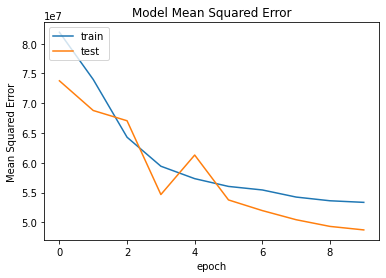

In [49]:
#plotting the Accuracy between training and test sets
import matplotlib.pyplot as plt
# plt.ylim(0.5,0.9)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

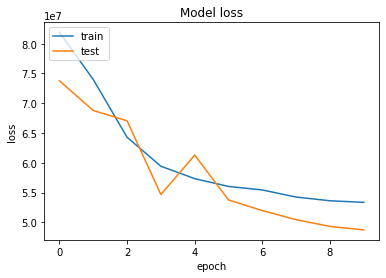

In [50]:
#plotting the loss between training and test sets

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Standardized Dataset

Standardizing the train and test data using sklearn Standardscaler.

In [51]:
#standardized the train and test data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc= sc.fit_transform(X_train_tk)
X_test_sc = sc.fit_transform(X_test_tk)

In [52]:
model2=build_model()
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               12032     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 26,561
Trainable params: 26,561
Non-trainable params: 0
_________________________________________________________________


In [53]:
EPOCHS=10
history1 = model2.fit(X_train_sc, y_train_tk, epochs=EPOCHS, validation_split=0.2,
                   verbose=0)

In [54]:
train_pred1= model2.predict(X_train_sc).flatten()
test_pred1 = model2.predict(X_test_sc).flatten()

In [55]:
print('Train Mean Squared error', mean_squared_error(y_train_tk, train_pred1))
print('Test Mean Squared error', mean_squared_error(y_test_tk, test_pred1))
print('test R2-score',r2_score(y_test_tk, test_pred1))

Train Mean Squared error 22084242.589710906
Test Mean Squared error 23025315.259383038
test R2-score 0.8151974965285567


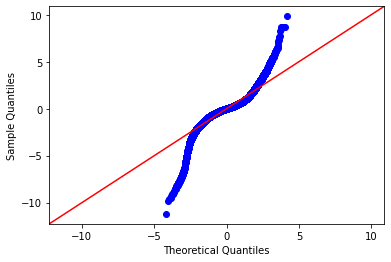

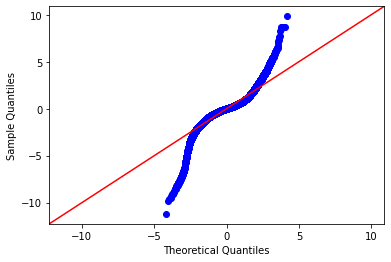

In [56]:
residuals_nn = (y_test_tk - test_pred1)
sm.graphics.qqplot(residuals_nn, dist= stats.norm, line = "45", fit =True)


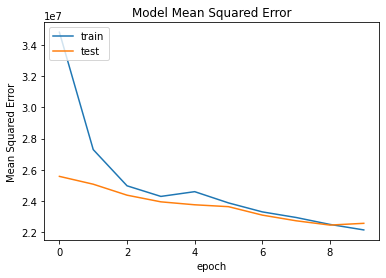

In [57]:
#plotting the MSE between training and test sets
import matplotlib.pyplot as plt

plt.plot(history1.history['mse'])
plt.plot(history1.history['val_mse'])

plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

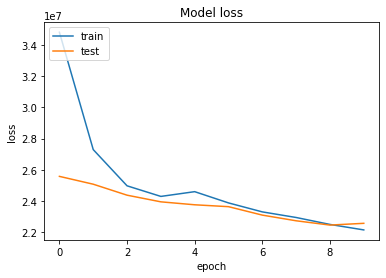

In [58]:
#plotting the loss between training and test sets

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**Making Predictions on Single instance**<br>
Let's check a single entire of the test data in the standardized neutral network Model

In [69]:
example1= X_test_sc[106:107]
example1

array([[ 0.02803497, -0.0233127 , -0.01852047, -0.00629014, -0.11531101,
        -0.17269858, -0.12338203, -0.12529602, -0.41326346, -0.13279587,
        -0.01309483, -0.19395323, -0.00363156, -0.05051531,  2.1535136 ,
        -0.19816042, -0.02054743, -0.25336671, -0.16182466, -0.09160521,
        -0.05064634, -0.22716799, -0.14417231, -0.00812064, -0.13615038,
        -0.08923321, -0.12099164, -0.15562432, -0.06510049, -0.07700671,
        -0.06954808,  0.        , -0.23542652, -0.08555599, -0.06291939,
        -0.19533995, -0.0536963 , -0.05728332, -0.1638303 , -0.04466962,
        -0.31081695, -0.16169589, -0.08081408, -0.41618997,  3.07950325,
        -0.08817605, -1.52799542, -0.02742784,  1.90407744, -0.06760685,
        -0.56562326, -0.45473755, -0.05244681, -0.01358924, -0.12556721,
        -0.61962785, -0.04207532, -0.03369664,  1.25342336, -0.24077633,
        -0.33204722,  2.87334361, -0.2518305 , -0.47560903, -0.45346992,
        -0.29339976, -0.30096879,  1.60101589, -0.3

In [70]:
print('Acutual Price:', y_test_tk[26:27])
example_pred1 = model2.predict(example1)
print('Predicted Price:',example_pred1)

Acutual Price: 167526    5395
Name: price, dtype: int64
Predicted Price: [[7064.4355]]


# Conclusion

| Model | Train mse | Test mse | R2
| :- |:------:|:------:| :-:
|Linear Regression| 43949336.94|44100238.79|0.65
|Random Forest| 44598084.57| 44755331.99|0.64
|Random Forest with Gridsearch|31241471.65|32856754.55|0.74
|Neural Network|48642697.53| 48622767.68|0.61
|Neutral Network Standardized data|22084242.59|23025315.26|0.82

Comparing all the models, Neutral Network standardized data is the best model to predict price of the vehicle from dataset. Odometer and year  of the vehicles has big impact on the price of the vehicles.The condition, drive and manufacturer of vehicles also have effect on the price of vehicle. 